<a href="https://colab.research.google.com/github/sayedtanvirahmed/Finite-Diffrence-Method/blob/main/Heat_Transfer_In_Cylinder_Sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome To The Computational World

User Input

Convective Heat Transfer Coefficient,(W/cm2/°C):0.04
Amient Temperature,(°C):20
Thermal Conductivity(W/cm·°C) :0.4
Heat Generation,(W/cm3):40
Domain (cylindrical/spherical) type? cylindrical
Computation Domain Lenght(cm):5
Number of division:10
[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]
A
 [[-1.       1.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.5     -2.       1.5      0.       0.       0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.75    -2.       1.25     0.       0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.83333 -2.       1.16667  0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.875   -2.       1.125    0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.9     -2.       1.1      0.
   0.       0.       0.       0.    

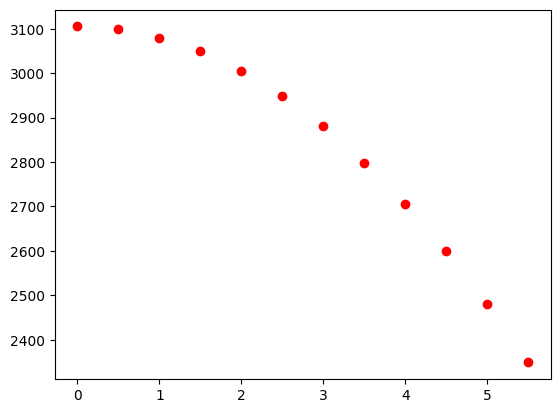

In [ ]:
## Heat transfer in cylindrical & Spherical Coordinate System using Finite element method

## Assignment (problem_09)
## Heat transfer in solid Sphere

## Sayed Tanvir Ahmed
## Reg_2018339050
## Course MEE_461


import numpy as np
import matplotlib.pyplot as plt
ha=0.04
t_am=20
k=0.4
g=40

def main():

    print("Welcome To The Computational World")
    print()
##properties user input
    print("User Input")
    print()
    ha=float(input("Convective Heat Transfer Coefficient,(W/cm2/°C):"))
    t_am=float(input("Amient Temperature,(°C):"))
    k=float(input("Thermal Conductivity(W/cm·°C) :"))
    g=float(input("Heat Generation,(W/cm3):"))

##Domain specification

    domain=input("Domain (cylindrical/spherical) type? ")
    L=int(input("Computation Domain Lenght(cm):" ))
    n=int(input("Number of division:"))
    h=L/(float(n))
    if domain=="cylindrical":
        s=-(g*h**2)/(4*k)
    if domain=="spherical":
        s=-(g*h**2)/(6*k)


##Solving Technique

    length_vector=[]
    x=0
    length_vector.append(x)
    for i in range(1,n+2):
        length_vector.append(x+h)
        x+=h
    X=np.array(length_vector)
    X=X.reshape(1,n+2)
    print(length_vector)
    m=n
    b=-2
    matA=[]
    r_o=0
    p=-(g*h**2)/k

## BC r=0. i=1

    col_1=[]
    col_1.append(-1)
    col_1.append(1)
    for i in range(2,n+2):
        col_1.append(0)
    matA.append(col_1)

## BC r=L,i=n

    coe_6 = -((2*h*ha)/k)
    col_2=[]
    for i in range (n-1):
        col_2.append(0)
        if i>=n-2:
           col_2.append(1)
           col_2.append(coe_6)
           col_2.append(-1)
           break

    q=((2*ha*h)*t_am)/k

## Construction of Coefficient matrix

    for i in range (2,n+2):
        if i ==1 :
           a=0
           c=0
           b=0

        else:
            if domain=="cylindrical":
                b=-2
                r_o+=h
                a=round((1-(h/(2*(r_o)))),5)
                c=round((1+(h/(2*(r_o)))),5)
            if domain=="spherical":
                b=-2
                r_o+=h
                a=round((1-(h/((r_o)))),5)
                c=round((1+(h/((r_o)))),5)

        column=[]
        for j in range (1,m+3):
            if j ==(i-1):
                column.append(a)
                continue
            if j==i:
                column.append(b)
                continue
            if j==(i+1):
                column.append(c)
                continue
            else:
                column.append(0)
        matA.append(column)

    matA.append(col_2)

    matA=np.matrix(matA)

## Construction of constant vector

    matB=[]
    matB.append(s)
    for i in range(2,n+2):
        matB.append(p)
    matB.append(q)

    print("A\n", matA)
    print("B\n", matB)


## Matrix Calculations

    inmatA=np.linalg.inv(matA)
    u=np.matmul(inmatA,matB)
    Y=np.array(u)
    print(u)

    plt.plot(X,Y, 'ro')
    plt.show()

if __name__ == '__main__':
    main()
